In [1]:
import pandas as pd

In [33]:
df = pd.read_excel('ICM_FinalProject_Part_1/ICM_FinalProject_Part_1/BIOCARD_ICM_random200.xlsx').replace("'", "", regex=True)
df.head()
#df.applymap(lambda x: x.replace("'", "") if (isinstance(x, str)) else x)

,'Subject_ID','Gender','Age','Diagnosis','ACR_R','AGWM_R','AG_R','ALIC_R','Amyg_R','AnteriorBasalForebrain_R',...,'TempSul_L','Thalamus_L','dorsalWM_ACC_L','dorsal_ACC_L','rostralWM_ACC_L','rostral_ACC_L','subcallosalWM_ACC_L','subcallosal_ACC_L','subgenualWM_ACC_L','subgenual_ACC_L'
0,Subject_1,F,56.8,NORMAL,14270,3694,12859,2294,2310,338,...,1175,6638,1523,13052,4,2403,104,475,225,1700
1,Subject_2,F,53.2,NORMAL,12964,3275,12063,2367,1697,243,...,858,5100,1419,10957,108,2127,18,282,160,1410
2,Subject_3,F,81.0,NORMAL,9742,3386,10980,1586,1400,175,...,1437,4546,795,9783,39,1829,0,262,73,1482
3,Subject_4,M,69.6,NORMAL,10960,3709,12992,2301,2150,301,...,1350,5400,1829,11468,34,1866,71,338,164,1772
4,Subject_5,M,55.3,NORMAL,13137,2757,13342,2275,2166,278,...,1713,5770,1421,11365,20,2184,74,491,162,1887


In [63]:
columns_filter = [
    "'Diagnosis'", 
    "'Amyg_L'", 
    "'Amyg_R'", 
    "'Fimbria_L'", 
    "'Fimbria_R'", 
    "'Hippo_L'", 
    "'Hippo_R'", 
    "'Mammillary_L'", 
    "'Mammillary_R'"
]
BIOCARD = pd.DataFrame(df, columns=columns_filter)
BIOCARD

,'Diagnosis','Amyg_L','Amyg_R','Fimbria_L','Fimbria_R','Hippo_L','Hippo_R','Mammillary_L','Mammillary_R'
0,NORMAL,1934,2310,11,8,4003,3980,87,92
1,NORMAL,1590,1697,2,30,3358,3418,88,74
2,NORMAL,1213,1400,0,4,3038,3149,95,94
3,NORMAL,1772,2150,0,13,3302,3521,109,76
4,NORMAL,1802,2166,15,36,3560,3590,134,97
...,...,...,...,...,...,...,...,...,...
195,NORMAL,1714,1859,9,34,3783,3767,73,81
196,NORMAL,2120,2120,20,22,4374,3975,83,64
197,NORMAL,1586,2229,4,27,3709,3931,81,85
198,NORMAL,1841,2228,4,2,3782,3632,111,111


In [67]:
#filter non normal values
NORMAL = BIOCARD.loc[BIOCARD["\'Diagnosis\'"] == BIOCARD["\'Diagnosis\'"][0]]
mu = NORMAL.mean()
sigma = NORMAL.std(ddof=0)

/tmp/ipykernel_680138/487326185.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mu = NORMAL.mean()
/tmp/ipykernel_680138/487326185.py:4: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sigma = NORMAL.std()


In [80]:
zscores = (BIOCARD - mu) / sigma
zscores = zscores.loc[:, zscores.columns != "\'Diagnosis\'"]
zscores

,'Amyg_L','Amyg_R','Fimbria_L','Fimbria_R','Hippo_L','Hippo_R','Mammillary_L','Mammillary_R'
0,1.331667,1.643904,0.128899,-1.191094,1.296435,1.203974,-0.255344,0.858301
1,-0.378863,-0.849773,-1.011859,1.017535,-0.506643,-0.466353,-0.197401,-0.358135
2,-2.253484,-2.057965,-1.265361,-1.592663,-1.401194,-1.265851,0.208204,0.993461
3,0.526127,0.993026,-1.265361,-0.689133,-0.663190,-0.160225,1.019413,-0.222975
4,0.675301,1.058113,0.635903,1.619888,0.058042,0.044850,2.468001,1.196200
...,...,...,...,...,...,...,...,...
195,0.237723,-0.190759,-0.124603,1.419104,0.681431,0.570914,-1.066554,0.114924
196,2.256546,0.870986,1.269658,0.214397,2.333554,1.189113,-0.487118,-1.033932
197,-0.398753,1.314397,-0.758357,0.716358,0.474567,1.058340,-0.603005,0.385243
198,0.869227,1.310329,-0.758357,-1.793447,0.678636,0.169679,1.135300,2.142317


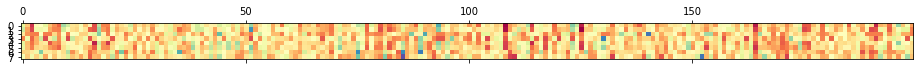

In [81]:
import matplotlib.pyplot as plt
plt.matshow(zscores.T, cmap='Spectral')